# Setup

In [1]:
import pypulse

from pypulse.visualization.bloch import *
from pypulse.visualization.plotting import *

import pypulse.visualization as viz

from pypulse.systems.transmon import Transmon

In [73]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import qutip as qt
import pandas as pd

from itertools import product, combinations

import datetime as dt
import os

if 'berkeley' in plt.style.available:
    plt.style.use('berkeley')

# Coupled Transmon System

We will now consider a system of two coupled Transmons. These may be coupled directly or coupled via a resonator, but we will only consider the effective coupling between them. Furthermore, we will first diagonalize the Transmons individually before applying the coupling term as a perturbation.

We can consider the total Hamiltonian as

$$H(t) = H_1(t) + H_2(t) + H_c(t)$$

where $H_i(t) = H_{i,0} + H_{i, \mathrm{drive}}$ is the total Hamiltonian for the $i$th transmon and $H_c(t)$ is the (possibly) time-dependent coupling between the two transmons. As in the previous notebook, the system Hamiltonian for the $i$th transmon is given by

$$H_{i, 0}(t) = \sum_n\omega_n(t) |n\rangle\langle n|$$

## Coupling Term

The coupling term of the Hamiltonian depends on the form of the coupling. For two capacitively coupled transmons, we have

$$ H_c(t) = -g(t) (a_1 - a_1^\dagger)(a_2 - a_2^\dagger) = g(t) \left(a_1a_2^\dagger + a_1^\dagger a_2 - a_1 a_2 - a_1^\dagger a_2^\dagger\right)$$

where $g(t)$ may be time-dependent. The time-dependence of $g$ generally comes from the some flux-tunable element between the two transmons that allows one to tune the effective coupling strength between the two transmons. 

Finally, while people often drop the latter two terms by making the RWA, you must consider the relevant coupling strengths before making such an approximation. In particular, you should have $g(t) << \omega_d$ in order to justify this approximation. (This is generally not true for parametric driving at the qubit detuning frequency).

## Microwave Drive Hamiltonian

The microwave drive hamiltonian is similar to the single qubit case, but slightly modified to account for the presence of crosstalk. Using a somewhat simplistic model of crosstalk, we can write

$$H_{i, \mathrm{drive}}(t) = \frac{1}{2}\left(\gamma_i(t) + \gamma_i^*(t)\right) i \left[(a_i - a_i^\dagger) + \beta_j(a_j - a_j^\dagger)\right]$$

where $\beta_j$ is some complex coefficient that accounts for a reduction of amplitude at the second qubit as well as a constant phase shift. Thus, we have $|\beta_j| \leq 1$. As in the single qubit case, we write

$$\gamma_i(t) = \Omega_i(t) e^{i\omega_{i,d} t}$$

where we fold the phase of the carrier signal into $\Omega_i(t)$. 

## Cross Resonance Effect

The cross resonance effect is often used to engineer two qubit gates with only microwave drives. 

## Parametric Driving

## Drive Hamiltonian

Generally, the field applied to a transmon via a control line is coupled to the transmon mode capacitively, so this coupling can be described by the hamiltonian

$$H_\mathrm{drive}(t) = \frac{1}{2}\left(\gamma(t) + \gamma^*(t)\right) i (a - a^\dagger)$$

where $\gamma(t)$ is the amplitude of the field, written in complex notation. We note that if our qubit is inductively coupled to the field, this would take the form $a + a^\dagger$

Generally we think of $\gamma(t)$ as consisting of a carrier that gets mixed with a pulse envelope. Thus, we can write

$$\gamma(t) = \Omega(t) e^{i(\omega_d t +\phi)}$$

where $\Omega(t) = I(t) + iQ(t)$ is the pulse envelope which is often written in terms of the in phase ($I$) and quadrature ($Q$) components. Thus we can write the total drive Hamiltonian as

$$H_\mathrm{drive}(t) = \frac{1}{2}\left(\Omega(t)e^{i(\omega_d t + \phi)} + \Omega^*(t) e^{-i(\omega_d t + \phi)}\right) i (a - a^\dagger)$$

In the following analysis we will just absorb $\phi$ into our definition of $\Omega(t)$

## Rotating Frames and the RWA

We can move into the frame of the drive (the "rotating frame") by applying a unitary transformation given by

$$U = \exp{i\omega_d t a^\dagger a} = \sum_n e^{in\omega_d t} |n\rangle \langle n|$$

The drive hamiltonian in the rotating frame [2] is then given by 

$$\widetilde{H}_\mathrm{drive} = U H_\mathrm{drive} U^\dagger + i\dot{U}U^\dagger$$

Since $a$ and $a^\dagger$ the only operators in $H_\mathrm{drive}$, we can simply compute

$$U a U^\dagger \rightarrow e^{i\omega_d t} \qquad Ua^\dagger U^\dagger \rightarrow e^{-i\omega_d t}$$

You may convince yourself that this is true by writing $a$ as $a = \sqrt{n}|n-1\rangle\langle n|$. Now after applying this transformation, the drive Hamiltonian becomes

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2} i \left(\Omega(t) a - \Omega^*(t) a^\dagger  - \Omega(t) a^\dagger e^{2i\omega_d t} + \Omega^*(t) a e^{-2i\omega_d t} \right)$$

The rotating wave approximation (RWA) states that since the last two terms are oscillating at a frequency $2\omega_d$, the contribution to the dynamics from these terms will average out on the timescale of interest. To understand when the RWA is able to applied, you should compare $\Omega(t)$ and $2\omega_d$, since $\max\{\Omega(t)\}$ dictates the timescale of the dynamics of interest and $2\omega_d$ dictates the timescale on which the fast oscillations become relevant. (In most cases when analyzing single qubit dynamics, $\max\{\Omega(t)/2\pi\} < 100$ MHz and $2\omega_d/2\pi \sim 5$ GHz so this is valid). See [3] for a discussion on when the RWA is valid.

After dropping the fast oscillating terms (making the RWA), the drive hamiltonian looks like

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2}i \left(\Omega(t) a - \Omega^*(t) a^\dagger\right)$$

which is the canonical hamiltonian you'll often see. This can also be written in terms of $I$ and $Q$ by taking $\Omega(t) = I(t) + iQ(t)$

$$\widetilde{H}_\mathrm{drive} = -\omega_d a^\dagger a + \frac{1}{2}\left(I(t) (a - a^\dagger)+ iQ(t)(a + a^\dagger)\right)$$

Finally, if we choose to remain in the lab frame, we can still make the RWA by droppping the appropriate terms after which

$$H_\mathrm{drive} \rightarrow \frac{1}{2}i\left(\Omega(t) a e^{i\omega_d t} + \Omega^* (t) a^\dagger e^{-i\omega_d t}\right)$$

### A small aside

We note that the $i = e^i\pi/2$ out front is simply a global phase, which we can always absorb into our definition of $\Omega(t)$. If we do this, we see that the drive Hamiltonian becomes

\begin{align}
\widetilde{H}_\mathrm{drive} 
&= -\omega_d a^\dagger a + \frac{1}{2}\left(a \Omega(t) + a^\dagger \Omega^*(t)\right) \\
&= -\omega_d a^\dagger a + \frac{1}{2}\left(I(t) (a + a^\dagger) + iQ(t) (a-a^\dagger) \right) \\
&\rightarrow -\omega_d (I - \sigma_z)/2 + \frac{1}{2}\left( I(t) \sigma_x + iQ(t) \sigma_y\right)
\end{align}

where in the last step we take the 2 level approximation. This is why you'll often see people describe $I$ and $Q$ as driving the $X$ and $Y$ quadratures of the qubit, but it is worth remembering that this is only true under the RWA. 

In order to engineer the RWA hamiltonian exactly, you would need to couple to supplement the capacitively coupled driving field with an inductively coupled driving field that is 90 degrees out of phase. This is similar to driving a spin system with circularly polarized light. See [4].

## Combining the System and Drive Hamiltonians

If we combine the system and drive hamiltonians, we see that in the frame of the drive, we have

$$H(t) = \Sigma_n \omega_n |n\rangle\langle n| -\omega_d a^\dagger a + \frac{1}{2}i\left(\Omega(t) a - \Omega^*(t)a^\dagger\right)$$

Normally, if when doing a single qubit gate we'll have $\omega_d = \omega_{01}$. But since $\omega_n \neq n\omega_{01}$ for a transmon, we'll be left with a drift hamiltonian, defined as 
$$H_\mathrm{drift} = H_\mathrm{system} - \omega_d a^\dagger a$$

The total hamiltonian in the frame of the drive is now given by (under the RWA)
$$H(t) = H_\mathrm{drift} + \frac{1}{2}\left(\Omega(t) a + \Omega^*(t) a^\dagger \right)$$

This can also be written in the lab frame (under the RWA) as
$$H(t) = H_\mathrm{system} + \frac{1}{2}\left(\Omega(t) a e^{i\omega_d t} + a^\dagger e^{-i\omega_d t}\right)$$

Finally, we may wish to not make the rotating wave approximation, in which case our lab frame hamiltonian is
$$H(t) = H_\mathrm{system} + \frac{1}{2}\left(\Omega(t) e^{i\omega_d t} + a^\dagger e^{-i\omega_d t}\right)(a + a^\dagger)$$

[1] https://arxiv.org/abs/1904.06560

[2] https://en.wikipedia.org/wiki/Unitary_transformation_(quantum_mechanics)

[3] https://berkeleyqnl.slack.com/archives/CL2NFJDC4/p1588306894337700

[4] https://journals.aps.org/pra/abstract/10.1103/PhysRevA.90.012302

# Setting up the System and Drive Hamiltonian

## Defining the System Parameters
This cell sets the 

In [3]:
Ec1, Ej1 = Transmon.compute_transmon_parameters(5.84, -0.25)
Ec2, Ej2 = Transmon.compute_transmon_parameters(5.69, -0.25)

In [4]:
N1, N2 = 3, 3

t1 = Transmon(Ec1, Ej1)
t2 = Transmon(Ec2, Ej2)

g = 2*np.pi*0.003

w1, w2 = t1.omega, t2.omega
f1, f2 = w1/(2*np.pi), w2/(2*np.pi)
alpha1, alpha2 = t1.alpha/(2*np.pi), t2.alpha/(2*np.pi)

print('f1', w1/(2*np.pi))
print('f2', w2/(2*np.pi))

a1 = qt.destroy(N1)
a2 = qt.destroy(N2)

n1 = t1.eigenbasis(N1)/w1
n2 = t2.eigenbasis(N2)/w2

H01 = qt.tensor(w1*n1, qt.qeye(N2))
H02 = qt.tensor(qt.qeye(N1), w2*n2)

Hc = g*sum([
    qt.tensor(t1.lowering_op(N1), t2.raising_op(N2)),
    qt.tensor(t1.raising_op(N1), t2.lowering_op(N2)),
    qt.tensor(t1.lowering_op(N1), t2.lowering_op(N2)),
    qt.tensor(t1.raising_op(N1), t2.raising_op(N2)),
])

H0 = H01 + H02 + Hc

display(H0)

f1 5.839447483478122
f2 5.689474157344301


Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.88495559e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.57480204e+01 0.00000000e+00 1.88495559e-02
  0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.99234091e+01 0.00000000e+00
  2.63624896e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.88495559e-02 0.00000000e+00 3.66903306e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63700681e-02
  0.00000000e+00]
 [1.88495559e-02 0.00000000e+00 2.63624896e-02 0.00000000e+00
  7.24383511e+01 0.00000000e+00 2.63700681e-02 0.00000000e+00
  3.68804788e-02]
 [0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.06613740e+02 0.00000000e+00 3.68804788e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [5]:
ens, evs = H0.eigenstates()

In [6]:
f1, f2

(5.839447483478122, 5.689474157344301)

In [7]:
print(ens/(2*np.pi))
ZZ = (ens[1] + ens[2] - ens[5] - ens[0])/(2*np.pi)
print(ZZ*1e6, 'kHZ')

[-7.80645695e-07  5.68941261e+00  5.83950591e+00  1.11286122e+01
  1.14283981e+01  1.15291384e+01  1.69678758e+01  1.71182784e+01
  2.25572325e+01]
-219.10758438328617 kHZ


## Defining the AWG Parameters and a Pulse

In [8]:
sampling_rate = 2.5
pulse_duration = 40.0

sample_ts = np.arange(sampling_rate*pulse_duration)/sampling_rate
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 10*sampling_rate)

(-0.3, 0.3)

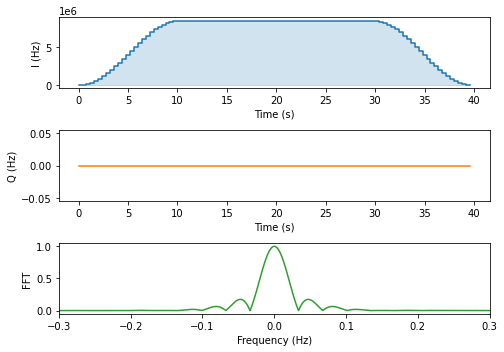

In [9]:
A = 8.449e6
fig, axes = viz.plot_pulse(sample_ts, A*cosine_pulse)
axes[-1].set_xlim(-0.3, 0.3)

In [10]:
ts, drive = pypulse.upconvert(A*cosine_pulse, w1/(2*np.pi), sampling_rate=sampling_rate, time_steps_per_sample=50, interpolate='linear')

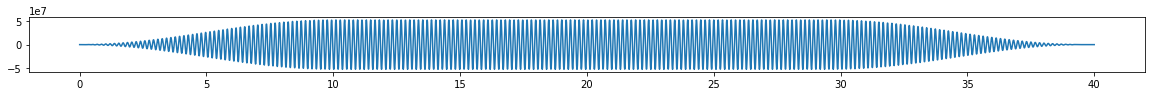

In [11]:
fig, ax = plt.subplots(figsize=(20, 1))
ax.plot(ts, np.real(drive))

# Simulating Pulses

In [12]:
def drive_hamiltonian(qid, Ns, xtalk=None, num_qubits=2):
    if xtalk is None:
        xtalk = np.zeros(num_qubits)
        xtalk[qid] = 1
    
    a_ops = [qt.destroy(N) for N in Ns]
    
    Hd = []
    
    for i, beta in enumerate(xtalk):
        if beta != 0:
            Hd += [
                qt.tensor(*[qt.qeye(Ns[j]) if j != i else beta*(a_ops[j] + a_ops[j].dag()) for j in range(num_qubits)])
            ]

    return sum(Hd)

In [13]:
# Single Qubit operators
psis1 = [qt.basis(N1, i) for i in range(N1)]
N1_ops = [psi*psi.dag() for psi in psis1]
P1_ops = [pypulse.expand_operator_dim(p, N1) for p in [qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]]

psis2 = [qt.basis(N2, i) for i in range(N2)]
N2_ops = [psi*psi.dag() for psi in psis2]
P2_ops = [pypulse.expand_operator_dim(p, N2) for p in [qt.qeye(2), qt.sigmax(), qt.sigmay(), qt.sigmaz()]]

In [14]:
N_ops = [qt.tensor(o1, o2) for o1, o2 in product(N1_ops, N2_ops)]
paulis = {f'{p1}{p2}': qt.tensor(o1, o2) for (p1, p2), (o1, o2) in zip(product(['I', 'X', 'Y', 'Z'], repeat=2), product(P1_ops, P2_ops))}

In [15]:
paulis['XY']

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

# Cross Resonance Pulse & Hamiltonian

In [16]:
pulse_duration=500
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 20*sampling_rate, 0.025)

In [71]:
pulse = cosine_pulse*np.exp(1j*-0.5)

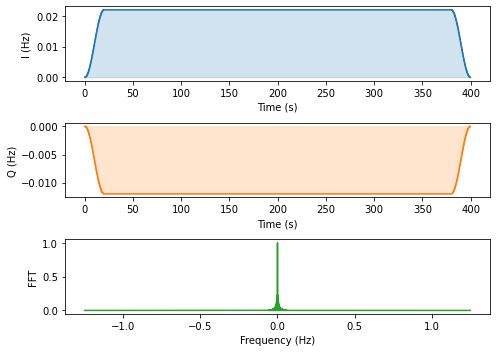

In [72]:
fig, ax = viz.plot_pulse(np.arange(len(cosine_pulse))/sampling_rate, pulse, IQ = True)

In [19]:
# H0 -= 2*np.pi*f1*qt.tensor(a.dag()*a, qt.qeye(2)) + 2*np.pi*f2*qt.tensor(qt.qeye(2), a.dag()*a)

display(H0)

Quantum object: dims = [[3, 3], [3, 3]], shape = (9, 9), type = oper, isherm = True
Qobj data =
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.88495559e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.57480204e+01 0.00000000e+00 1.88495559e-02
  0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.99234091e+01 0.00000000e+00
  2.63624896e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.88495559e-02 0.00000000e+00 3.66903306e+01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63700681e-02
  0.00000000e+00]
 [1.88495559e-02 0.00000000e+00 2.63624896e-02 0.00000000e+00
  7.24383511e+01 0.00000000e+00 2.63700681e-02 0.00000000e+00
  3.68804788e-02]
 [0.00000000e+00 2.63624896e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.06613740e+02 0.00000000e+00 3.68804788e-02
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

In [20]:
Hd1 = drive_hamiltonian(0, (N1,N2))
Hd2 = drive_hamiltonian(1, (N1,N2))

In [21]:
np.max(np.abs(-0.165*cosine_pulse))

0.004125

In [22]:
ts, drive1 = pypulse.upconvert(cosine_pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)
ts, drive2 = pypulse.upconvert(-0.165*cosine_pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)

H = [[H0, np.ones_like(ts)], [Hd1, np.real(drive1)], [Hd2, np.real(drive2)]]

In [23]:
(ens[1] - ens[0])/(2*np.pi)

5.689413390461827

In [24]:
(ens[5] - ens[2])/(2*np.pi)

5.689632498046211

## Define qutrit analysis functions

In [25]:

def qutrit_triplot(ts,result0,result1,result2,title):
    
    """ Plot the predicted Bloch vector trajectory for qutrits in three plots: one for X, one for Y, one for Z
    Arguments:
        ts (np.narray): times for Bloch vector data points
        result0 (np.array): Bloch vector trajectory for control in |0>
        result1 (np.array): Bloch vector trajectory for control in |1>
        result2 (np.array): Bloch vector trajectory for control in |2>
        title (str): Desired figure title
    Return:
        fig (figure (???)): Desired 3-plot output figure"""
 
        
    plt.rcParams['figure.figsize'] = [10, 7]
    fig,axes = plt.subplots(3,1)

    axes[0].plot(1e9*ts,result0[:,0])
    axes[0].plot(1e9*ts,result1[:,0])
    axes[0].plot(1e9*ts,result2[:,0])
    axes[0].set_ylim(-1.05,1.05)
    axes[0].set_ylabel(r'$\langle X \rangle$')
    axes[0].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')

    axes[1].plot(1e9*ts,result0[:,1])
    axes[1].plot(1e9*ts,result1[:,1])
    axes[1].plot(1e9*ts,result2[:,1])
    axes[1].set_ylabel(r'$\langle Y \rangle$')
    axes[1].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')

    axes[2].plot(1e9*ts,result0[:,2])
    axes[2].plot(1e9*ts,result1[:,2])
    axes[2].plot(1e9*ts,result2[:,2])
    axes[2].set_ylabel(r'$\langle Z \rangle$')
    axes[2].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')
    
    axes[0].set_title(title)
    axes[2].set_xlabel("Time (ns)")
    fig.tight_layout()

    #return(fig)

def toDf(result,ts,ctrl):
    result_t = list(zip(*result))
    resultdf = pd.DataFrame(data = ts*1e-9,columns = ['time'])
    cntrl = [ctrl]*len(ts)
    resultdf['control'] = cntrl
    resultdf['X'] = [row[0] for row in result_t]
    resultdf['Y'] = [row[1] for row in result_t]
    resultdf['Z'] = [row[2] for row in result_t]
    return(resultdf,result_t)


In [44]:
#### CR analysis
# from Alexis
from sklearn.decomposition import PCA


def fit_bloch_vector(df):
    """ fit the bloch vector for a given set of tomography
    Arguments:
        df (pd.DataFrame): dataFrame with columns as time, X, Y and Z
    Return:
        bloch_vector (np.array): the bloch vector obtained by fitting the rabi oscillation
    """

    # selecting the data to be process
    data = df[['X', 'Y', 'Z']].to_numpy()
    time = df['time'].values

    # applying the pca to find the basis in which rotation is happening
    pca = PCA(n_components=3)  # 3 refer to the number of axis, here 3
    pca.fit(data)

    # 2) We now rotate in the basis given by  the lowest variance obtained throuh PCA
    bloch_vector = pca.components_[-1]
    bloch_vector *= np.sign(bloch_vector[0])  # taking a convention
    R = rotation(bloch_vector)
    Xp = np.einsum('ij,jk', R, data.T).T  # get into the nice basis

    # 3) Fitting the 2 dimension orthogonal to B with a sin and a cos. The frequency obtained
    # with this fitting will give directly the norm of the bloch vector.
    # Finally, B = |B| n
    offset = np.mean(Xp[:, 2])
    y = Xp[:, 0] + 1j * Xp[:, 1]

    model = RabiOscillation2D()
    guess = model.guess(y, x=time)
    result = model.fit(y, guess, x=time)

    bloch_vector_strength = result.params['f'].value

    return bloch_vector, bloch_vector_strength, offset, result


def oscillation_from_bloch_vector(time, bloch_vector, bloch_vector_strength, offset, fit_result):
    """ return the array of rabi oscillation for a given bloch vector """

    R = rotation_inv(bloch_vector)
    trajectory_c = rabi_oscillation_in_plane(time, bloch_vector_strength,
                                             fit_result.params['A'].value,
                                             fit_result.params['theta0'].value)

    trajectory = np.array([trajectory_c.real,
                           trajectory_c.imag,
                           offset * np.ones(len(fit_result.best_fit))]).T
    return np.einsum('ij,jk', R, trajectory.T).T


#Look at plane of PCA, first need analyze(self):
from sklearn.decomposition import PCA
from qtrl.fitting.models import RabiOscillation2D
from qtrl.fitting.models import rabi_oscillation_in_plane


def rotation(R):
    """ calculate the matrix of a rotation going from the R axis to Z
    Rotation = 1 + V + 1/(1+Z) V@V with V = [[0,0,-X], [0,0,-Y], [X,Y,0]]
    """
    v = np.array([[0, 0, -R[0]], [0, 0, -R[1]], [R[0], R[1], 0]])
    return np.eye(3) + v + 1 / (1 + R[2]) * v @ v

def rotation_inv(R):
    """ calculate the matrix of a rotation going from the Z axis to R
    Rotation = 1 + V + 1/(1+Z) V@V with V = [[0,0,X], [0,0,Y], [-X,-Y,0]]
    """
    v = np.array([[0, 0, R[0]], [0, 0, R[1]], [-R[0], -R[1], 0]])
    return np.eye(3) + v + 1 / (1 + R[2]) * v @ v

## Simulated Qutrit CR Gate Time Sweep

In [27]:
#simulate data
result0 = qt.mesolve(H, qt.ket('00', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
result1 = qt.mesolve(H, qt.ket('10', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
result2 = qt.mesolve(H, qt.ket('20', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])

In [28]:
#converting x and y coordinates to rotationg frame
result0w_r = viz.rotating_frame(ts,*result0.expect,omega = 2*np.pi*f2)
result1w_r = viz.rotating_frame(ts,*result1.expect,omega = 2*np.pi*f2)
result2w_r = viz.rotating_frame(ts,*result2.expect,omega = 2*np.pi*f2)

#transfer rotating frame coordinates to dataframe
result0df,result0wr_t = toDf(result0w_r,ts,'0')
result1df,result1wr_t = toDf(result1w_r,ts,'1')
result2df,result2wr_t = toDf(result2w_r,ts,'2')

In [29]:
#fit Bloch vector and oscillations
b0,bs0,off0,res0 = fit_bloch_vector(result0df)
res0_fitted = oscillation_from_bloch_vector(result0df['time'].values,b0,bs0,off0,res0)

b1,bs1,off1,res1 = fit_bloch_vector(result1df)
res1_fitted = oscillation_from_bloch_vector(result0df['time'].values,b1,bs1,off1,res1)

b2,bs2,off2,res2 = fit_bloch_vector(result2df)
res2_fitted = oscillation_from_bloch_vector(result0df['time'].values,b2,bs2,off2,res2)

-4651288.341309877
-2284717.4524745154
-5408344.012735167


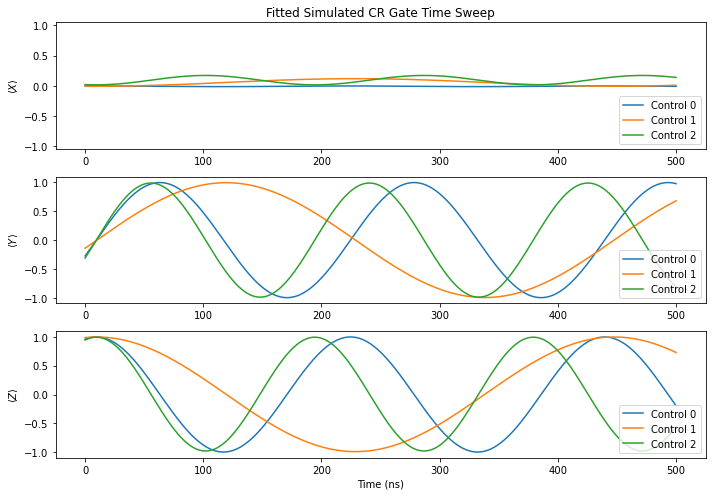

In [30]:
#plot oscillations
f = qutrit_triplot(result0df['time'].values,res0_fitted,res1_fitted,res2_fitted,'Fitted Simulated CR Gate Time Sweep')

## Simulated Qutrit CR Gate Phase Sweep

In [ ]:
pulse_duration=400
phases = 2*np.pi*np.linspace(-1,1,8)
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 20*sampling_rate, 0.025)
%matplotlib inline

for k in phases:
    pulse = cosine_pulse*np.exp(1j*k)
    
    Hd1 = drive_hamiltonian(0, (N1,N2))
    Hd2 = drive_hamiltonian(1, (N1,N2))
    ts, drive1 = pypulse.upconvert(pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)
    ts, drive2 = pypulse.upconvert(-0.165*pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)

    H = [[H0, np.ones_like(ts)], [Hd1, np.real(drive1)], [Hd2, np.real(drive2)]]
    
    result0 = qt.mesolve(H, qt.ket('00', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    result1 = qt.mesolve(H, qt.ket('10', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    result2 = qt.mesolve(H, qt.ket('20', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    
    result0w_r = viz.rotating_frame(ts,*result0.expect,omega = 2*np.pi*f2);
    result1w_r = viz.rotating_frame(ts,*result1.expect,omega = 2*np.pi*f2);
    result2w_r = viz.rotating_frame(ts,*result2.expect,omega = 2*np.pi*f2);

    result0df,result0wr_t = toDf(result0w_r,ts,'0');
    result1df,result1wr_t = toDf(result1w_r,ts,'1');
    result2df,result2wr_t = toDf(result2w_r,ts,'2');
    
    b0,bs0,off0,res0 = fit_bloch_vector(result0df)
    res0_fitted = oscillation_from_bloch_vector(result0df['time'].values,b0,bs0,off0,res0);

    b1,bs1,off1,res1 = fit_bloch_vector(result1df);
    res1_fitted = oscillation_from_bloch_vector(result0df['time'].values,b1,bs1,off1,res1);

    b2,bs2,off2,res2 = fit_bloch_vector(result2df);
    res2_fitted = oscillation_from_bloch_vector(result0df['time'].values,b2,bs2,off2,res2);
    
    print(' ')
    
    qutrit_triplot(result0df['time'].values,res0_fitted,res1_fitted,res2_fitted,'Fitted Simulated CR Gate Time Sweep')


-4643755.442945526
-2280447.8272656226
-5399220.692514412
 
4643755.808696024
2280445.8832979645
5399220.701586771
 
4643755.614235679
2280448.5540183354
5399220.714400261
 
-4643755.6008800035
-2280445.692761395
-5399220.699956738
 


## Simulated Qutrit CR Gate Amplitude Sweep

4659189.394262383
2288179.10112256
5417825.976139875
11192638.242947437
6202466.770378829
11411249.184542771
18016329.693791375
10936738.465754682
16281764.427247316
24781579.873598732
16053923.126064992
21123032.79418096


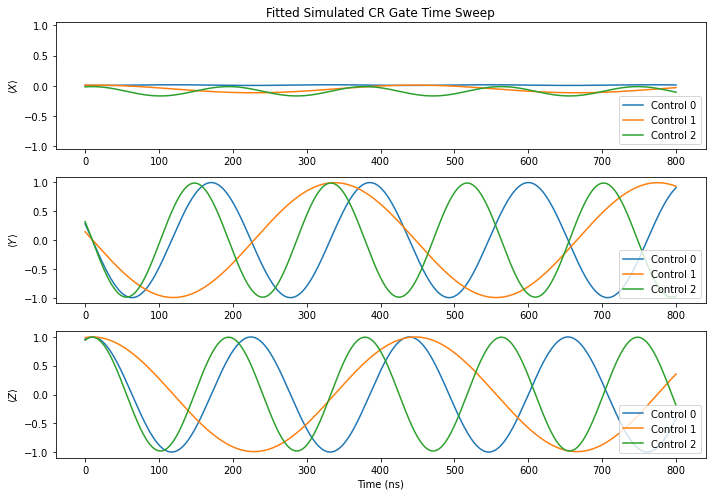

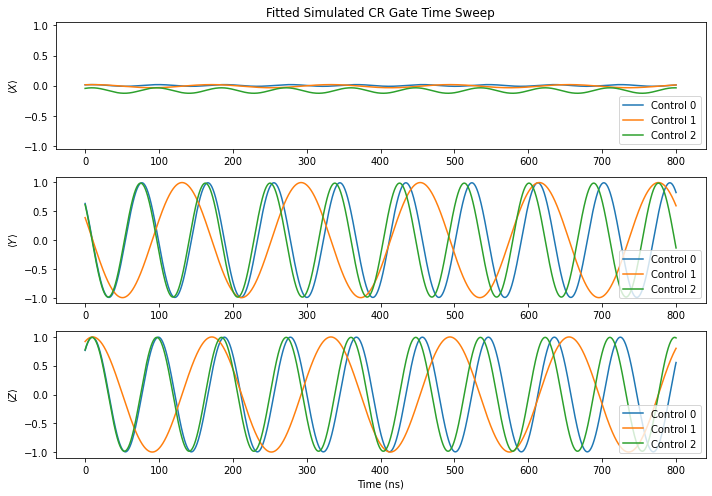

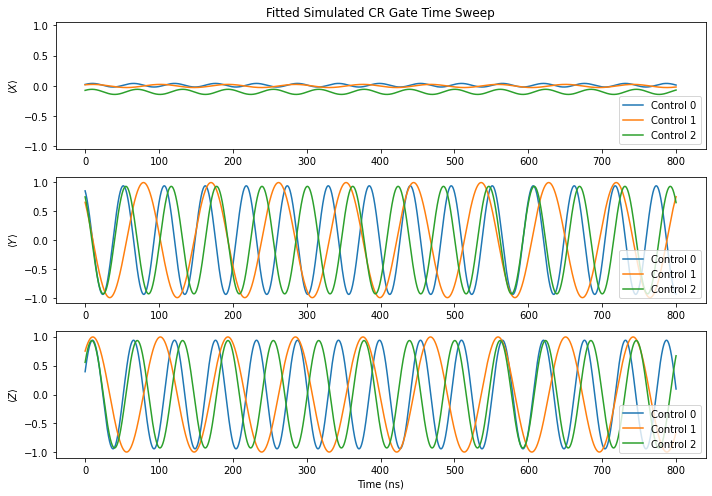

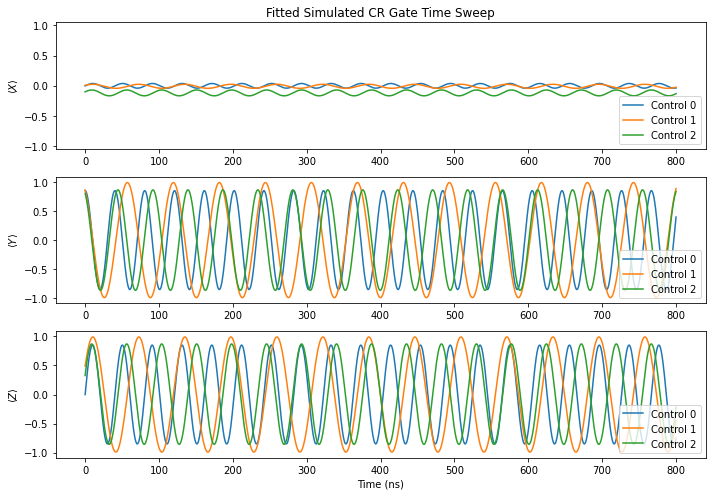

In [33]:
pulse_duration=800
phase = np.pi
amplitudes = np.linspace(1,5,4)
cosine_pulse = pypulse.cosine_ramp(pulse_duration*sampling_rate, 20*sampling_rate, 0.025)
%matplotlib inline

for A in amplitudes:
    pulse = cosine_pulse*np.exp(1j*phase)*A
    Hd1 = drive_hamiltonian(0, (N1,N2))
    Hd2 = drive_hamiltonian(1, (N1,N2))
    ts, drive1 = pypulse.upconvert(pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)
    ts, drive2 = pypulse.upconvert(-0.165*pulse, f2, sampling_rate=sampling_rate, time_steps_per_sample=50)

    H = [[H0, np.ones_like(ts)], [Hd1, np.real(drive1)], [Hd2, np.real(drive2)]]
    
    result0 = qt.mesolve(H, qt.ket('00', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    result1 = qt.mesolve(H, qt.ket('10', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    result2 = qt.mesolve(H, qt.ket('20', (N1, N2)), ts, e_ops=[paulis[p] for p in ['IX', 'IY', 'IZ']])
    
    result0w_r = viz.rotating_frame(ts,*result0.expect,omega = 2*np.pi*f2)
    result1w_r = viz.rotating_frame(ts,*result1.expect,omega = 2*np.pi*f2)
    result2w_r = viz.rotating_frame(ts,*result2.expect,omega = 2*np.pi*f2)

    result0df,result0wr_t = toDf(result0w_r,ts,'0')
    result1df,result1wr_t = toDf(result1w_r,ts,'1')
    result2df,result2wr_t = toDf(result2w_r,ts,'2')
    
    b0,bs0,off0,res0 = fit_bloch_vector(result0df);
    res0_fitted = oscillation_from_bloch_vector(result0df['time'].values,b0,bs0,off0,res0);
    
    b1,bs1,off1,res1 = fit_bloch_vector(result1df);
    res1_fitted = oscillation_from_bloch_vector(result0df['time'].values,b1,bs1,off1,res1);

    b2,bs2,off2,res2 = fit_bloch_vector(result2df);
    res2_fitted = oscillation_from_bloch_vector(result0df['time'].values,b2,bs2,off2,res2);
    
    qutrit_triplot(result0df['time'].values,res0_fitted,res1_fitted,res2_fitted,'Fitted Simulated CR Gate Time Sweep')


## Real Data Analysis + Plot

In [431]:
import pandas as pd
real_data = pd.read_pickle('testdata9:11_time.pickle','infer')
real_data0 = real_data.iloc[:][0:37]
real_data1 = real_data[:][37:74]
real_data2 = real_data[:][74:110]

b0_real,bs0_real,off0_real, res0_real= fit_bloch_vector(real_data0)
res0_fitted_real = oscillation_from_bloch_vector(real_data0['time'].values, b0_real, bs0_real, off0_real,res0_real)

b1_real,bs1_real,off1_real, res1_real = fit_bloch_vector(real_data1)
res1_fitted_real = oscillation_from_bloch_vector(real_data1['time'].values, b1_real, bs1_real, off1_real,res1_real)

b2_real,bs2_real,off2_real,res2_real = fit_bloch_vector(real_data2)
res2_fitted_real = oscillation_from_bloch_vector(real_data2['time'].values, b2_real, bs2_real, off2_real,res2_real)

4462220.790345363
2115213.189091023
4894656.608828906


Text(0.5, 0, 'Time (ns)')

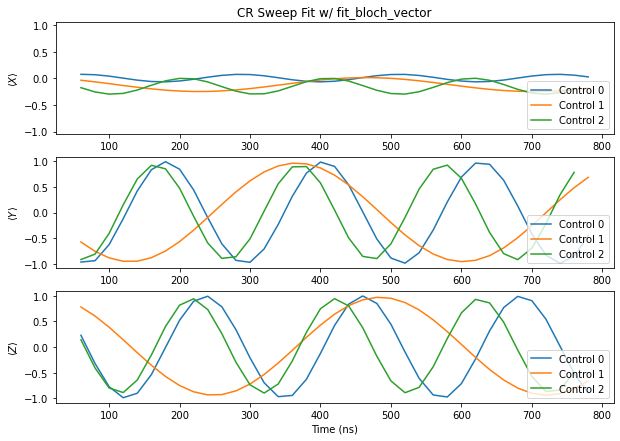

In [432]:
fig,axes_real = plt.subplots(3,1)

axes_real[0].plot(1e9*real_data0['time'].values,res0_fitted_real[:,0])
axes_real[0].plot(1e9*real_data1['time'].values,res1_fitted_real[:,0])
axes_real[0].plot(1e9*real_data2['time'].values,res2_fitted_real[:,0])
axes_real[0].set_ylabel(r'$\langle X \rangle$')
axes_real[0].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')
axes_real[0].set_ylim(-1.05,1.05)

axes_real[1].plot(1e9*real_data0['time'].values,res0_fitted_real[:,1])
axes_real[1].plot(1e9*real_data1['time'].values,res1_fitted_real[:,1])
axes_real[1].plot(1e9*real_data2['time'].values,res2_fitted_real[:,1])
axes_real[1].set_ylabel(r'$\langle Y \rangle$')
axes_real[1].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')

axes_real[2].plot(1e9*real_data0['time'].values,res0_fitted_real[:,2])
axes_real[2].plot(1e9*real_data1['time'].values,res1_fitted_real[:,2])
axes_real[2].plot(1e9*real_data2['time'].values,res2_fitted_real[:,2])
axes_real[2].set_ylabel(r'$\langle Z \rangle$')
axes_real[2].legend(["Control 0","Control 1", "Control 2"],loc = 'lower right')

axes_real[0].set_title('CR Sweep Fit w/ fit_bloch_vector')
axes_real[2].set_xlabel('Time (ns)')

In [74]:
help(viz.rotating_frame)

Help on function rotating_frame in module pypulse.visualization.plotting:

rotating_frame(t, x, y, z=0, omega=0)
    Computes the x, y coordinates in a frame rotating with frequency omega.
    
    This function currently only supports rotations about the Z axis, but should
    be extended to support an arbitrary axis of rotation.
    
    Args:
        t (numpy.array): A list of time steps corresponding to the trajectory. 
        x (numpy.array): The X values at each time step.
        y (numpy.array): The Y values at each time step.
        z (numpy.array): The Z values at each time step. (Not used)
        omega (float): The frequency of rotation (in angular units).
    
    Returns:
        tuple: A tuple (x, y, z) of the coordinates in the rotating frame.

